In [1]:
import json, os
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches, patheffects
import numpy as np
import seaborn as sns
import pandas as pd
from skimage.measure import block_reduce
import urllib.request
import imageio
from tqdm import tqdm_notebook as tqdm

In [2]:
PATH = '/local/S.Rasp/tmp/dataset1/'

In [6]:
arr = np.array(Image.open(PATH + '/annotations_prepped_train/0016E5_08640.png'))

In [7]:
arr

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)

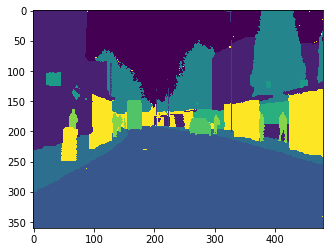

In [5]:
plt.imshow(np.array(Image.open(PATH + '/annotations_prepped_train/0016E5_08640.png')))

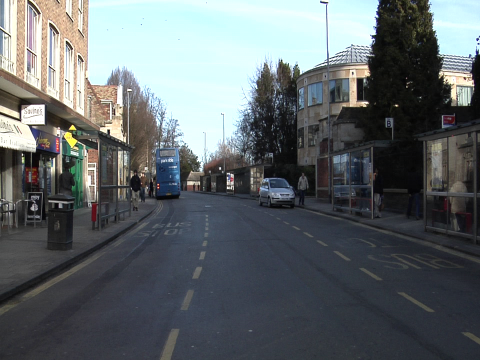

In [4]:
Image.open(PATH + '/images_prepped_train/0016E5_08640.png')

## Cloud dataset - basic setup

In [9]:
IMG_PATH = '/local/S.Rasp/MPI_Aqua/raw/'

In [10]:
with open('labelbox_annotations/labelbox_0821.json', 'r') as f:
    data_new = json.load(f)

In [11]:
# Get all unique image fns
fns = list(set([d['External ID'] for d in data_new]))

In [8]:
np.array(Image.open(IMG_PATH+fns[0])).shape

(1144, 1140, 3)

In [12]:
labeler = {d['External ID']: d['Created By'] for d in data_new}

In [30]:
MASK_PATH = '/local/S.Rasp/MPI_Aqua/masks/'

In [169]:
labels = defaultdict(list)
for d in data_new:
    cats = d['Label']
    l = d['Created By']
    fn = d['External ID']
    if 'No fit' in cats.keys():
        labels[fn] = []
    else:
        for i, c in enumerate(list(cats.keys())):
            xs = [cats[c][0]['geometry'][i]['x'] for i in range(4)]
            ys = [cats[c][0]['geometry'][i]['y'] for i in range(4)]
#             bl_x = d['Label'][c][0]['geometry'][1]['x']
#             bl_y = d['Label'][c][0]['geometry'][1]['y']
#             tr_x = d['Label'][c][0]['geometry'][3]['x']
#             tr_y = d['Label'][c][0]['geometry'][3]['y']
            bl_x = np.min(xs); bl_y = np.min(ys)
            tr_x = np.max(xs); tr_y = np.max(ys)
            msk_fn = MASK_PATH + fn[:-4] + f'_m{i}.png'
            print(msk_fn)
            if not os.path.exists(msk_fn):
                print('Downloading')
                urllib.request.urlretrieve(d['Masks'][c], msk_fn)
            labels[fn].append([c, (bl_x, bl_y, tr_x, tr_y), l, msk_fn])

/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170228_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170227_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170218_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170216_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170212_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170210_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170209_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170209_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170208_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170208_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170207_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170207_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170206_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20170206_m0.png
/local

/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091229_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091228_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091227_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091226_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091225_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091224_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091223_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091222_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091220_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091218_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091218_m1.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091217_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091216_m0.png
/local/S.Rasp/MPI_Aqua//masks/Aqua_CorrectedReflectance20091215_m0.png
/local

In [50]:
# Count classes
classes = [list(d['Label'].keys()) for d in data_new if d['Label'] != 'Skip']
classes = [item for sublist in classes for item in sublist]

In [51]:
classes = pd.Series(classes)

In [52]:
classes.value_counts()

Shallow      385
No fit       284
Cold pool    198
Flower       168
Fishbone     118
dtype: int64

In [53]:
def bb_hw(a): return np.array([a[0],a[1],a[2]-a[0],a[3]-a[1]])

In [54]:
def show_img(fn, ax=None):
    if ax is None: fig, ax = plt.subplots(figsize=(10,10))
    img = Image.open(IMG_PATH + fn)
    ax.imshow(np.flipud(img), origin='lower')
    for l in labels[fn]:
        bb = bb_hw(l[1])
        patch = ax.add_patch(
            patches.Rectangle(bb[:2], *bb[-2:], fill=False, edgecolor='red', lw=2))
#         print(l[1], bb)
        text = ax.text(*bb[:2], l[0] + ' ' + l[2], horizontalalignment='left',
                verticalalignment='bottom', color='red', fontsize=15, weight='bold')

In [55]:
cats = list(set(classes)); cats

['Fishbone', 'Flower', 'Cold pool', 'No fit', 'Shallow']

In [56]:
cats

['Fishbone', 'Flower', 'Cold pool', 'No fit', 'Shallow']

In [57]:
cat2id = {c: i for i, c in enumerate(cats)}

## Prepare the masks

In [74]:
cat2id

{'No fit': 0, 'Fishbone': 1, 'Flower': 2, 'Shallow': 3, 'Cold pool': 4}

In [188]:
for fn, l in tqdm(labels.items()):
    
    ms = []
    for ll in l:
        bb = ll[1]
        m = np.zeros(arr.shape[:-1])
        m[bb[1]:bb[3],bb[0]:bb[2]] = cat2id[ll[0]]
        ms.append(m)
    if len(l) > 1:
        ms_bin = [np.greater(m, 0) for m in ms]
        ms = np.array(ms)
        ms_bin = np.array(ms_bin)
        overlap = np.equal(np.mean(ms, 0), ms[0])
        tot_msk = np.mean(ms, 0)
        too_many = (overlap == 0) & (np.sum(ms_bin, 0) > 1)
        one_cat  = (overlap == 0) & (np.sum(ms_bin, 0) == 1)
        tot_msk[too_many] = 0; tot_msk[one_cat] = np.max(ms, 0)[one_cat]
    elif len(l) == 1:
        tot_msk = m
    else:
        tot_msk = np.zeros(arr.shape[:-1])
    tot_msk = np.flipud(tot_msk.astype('uint8'))
    imageio.imsave(MASK_PATH + fn, tot_msk)

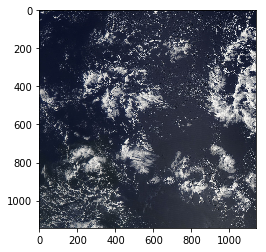

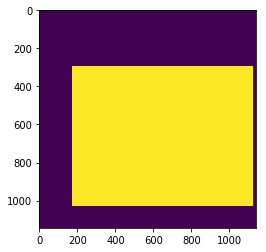

In [193]:
fn = fns[6]
plt.imshow(Image.open(IMG_PATH + fn)); plt.show()
plt.imshow(np.array(Image.open(MASK_PATH + fn))); plt.show()

THEANO_FLAGS=device=cuda,floatX=float32  python  train.py \
 --save_weights_path=/local/S.Rasp/tmp \
 --train_images="/local/S.Rasp/MPI_Aqua/raw/" \
 --train_annotations="/local/S.Rasp/MPI_Aqua/masks/" \
 --n_classes=5 \
 --input_height=1144 \
 --input_width=1140 \
 --model_name="vgg_segnet" 
 

In [9]:
256**2

65536

### convert

In [13]:
sz = np.array(Image.open(IMG_PATH + fns[0])).shape[:-1]; sz

(1144, 1140)

In [58]:
cat2id

{'Fishbone': 0, 'Flower': 1, 'Cold pool': 2, 'No fit': 3, 'Shallow': 4}

In [61]:
for fn in tqdm(fns):
    m = np.array(Image.open(MASK_PATH + fn[:-4] + '_mask.png'))
    m2 = np.zeros(sz, dtype='uint8')
    #for i in range(1, 5):
    m2[m==4] = 1
    imageio.imsave(MASK_PATH + fn[:-4] + '_mask2_shallow.png', m2)

## tf_unet

In [2]:
from tf_unet import unet, util, image_util

/home/s/S.Rasp/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [62]:
train_data = image_util.ImageDataProvider('/local/S.Rasp/MPI_Aqua/raw/*.png', 
                                          data_suffix='.png', mask_suffix='_mask2_shallow.png',
                                          , )

Number of files used: 903


In [76]:
train_data.n_class

2

In [77]:
net = unet.Unet(layers=3, features_root=64, channels=3, n_class=2)

2018-09-03 13:39:48,936 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [78]:
trainer = unet.Trainer(net)

In [73]:
X, y = train_data(2)

In [74]:
X.shape

(2, 1144, 1140, 3)

In [75]:
y.shape

(2, 1144, 1140, 2)

In [72]:
np.array(Image.open(train_data.data_files[0][:-4] + train_data.mask_suffix)).shape

(1144, 1140)

In [79]:
path = trainer.train(train_data, '/local/S.Rasp/tmp/', training_iters=32, epochs=2)

2018-09-03 13:39:54,684 Removing '/home/s/S.Rasp/repositories/cloud-classification/prediction'
2018-09-03 13:39:54,687 Removing '/local/S.Rasp/tmp'
2018-09-03 13:39:54,689 Allocating '/home/s/S.Rasp/repositories/cloud-classification/prediction'
2018-09-03 13:39:54,690 Allocating '/local/S.Rasp/tmp'
2018-09-03 13:40:01,781 Verification error= 31.9%, loss= 0.6896
/home/s/S.Rasp/.local/lib/python3.6/site-packages/tf_unet-0.1.1-py3.6.egg/tf_unet/util.py:74: RuntimeWarning: invalid value encountered in true_divide
  img /= np.amax(img)
2018-09-03 13:40:03,581 Start optimization


ResourceExhaustedError: OOM when allocating tensor with shape[1,64,1106,1102] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: up_conv_0/Relu_1-0-TransposeNHWCToNCHW-LayoutOptimizer = Transpose[T=DT_FLOAT, Tperm=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](up_conv_0/conv2d/dropout/mul, PermConstNHWCToNCHW-LayoutOptimizer)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: gradients_1/cost/Reshape_grad/Shape/_325 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_548_gradients_1/cost/Reshape_grad/Shape", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
